This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

In [5]:
api_key = ""
with open('./.api-key') as file:
    api_key = file.readline()

# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = api_key

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
url_example = 'https://www.quandl.com/api/v3/datasets/FSE/EON_X?start_date=2019-04-18&end_date=2019-04-18&api_key='+API_KEY
r_example = requests.get(url_example)

In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
json_data_example = r_example.json()
for k in json_data_example['dataset'].keys():
    print(k + ': ', json_data_example['dataset'][k])

id:  36592406
dataset_code:  EON_X
database_code:  FSE
name:  E.on Se (EON_X)
description:  Stock Prices for E.on Se (EON) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE000ENAG999
refreshed_at:  2019-04-26T22:40:30.545Z
newest_available_date:  2019-04-26
oldest_available_date:  2003-01-20
column_names:  ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']
frequency:  daily
type:  Time Series
premium:  False
limit:  None
transform:  None
column_index:  None
start_date:  2019-04-18
end_date:  2019-04-18
data:  [['2019-04-18', None, 9.841, 9.744, 9.83, None, 8483368.0, 83224703.0, None, None, None]]
collapse:  None
order:  None
database_id:  6129


# These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [5]:
# Import other relevant modules
from collections import defaultdict
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [6]:
# Now, call the Quandl API and pull out data between 2017-01-01 and 2017-12-31
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-01&end_date=2017-12-31&api_key=v-tJHS_z7h1zDDVskj6S'

In [7]:
#JSON structure
r = requests.get(url)
json_data = r.json()

In [8]:
# Using defaultfict to extract data
afx_dict = defaultdict(list)
for k in json_data['dataset'].keys():
    afx_dict[k].append(json_data['dataset'][k])

In [9]:
# Inspecting column with names of data
afx_dict['column_names']

[['Date',
  'Open',
  'High',
  'Low',
  'Close',
  'Change',
  'Traded Volume',
  'Turnover',
  'Last Price of the Day',
  'Daily Traded Units',
  'Daily Turnover']]

In [172]:
# Calculate what the highest and lowest opening prices were for the stock in this period
# Get date and open price 
date = []
open_price = []
l = len(afx_dict['data'][0]) #lenght data

for k in range(l):
    date.append(afx_dict['data'][0][k][0])
    open_price.append(afx_dict['data'][0][k][1]) 

In [173]:
# Sort date data and convert in datetime type. Then, extract min and max date. We'll use this in all graphs
d = list(map(lambda x: datetime.datetime.strptime(date[::-1][x],"%Y-%m-%d").date(), range(0, len(date))))
datemin = np.datetime64(d[0], 'm')
datemax = np.datetime64(d[-1], 'm')

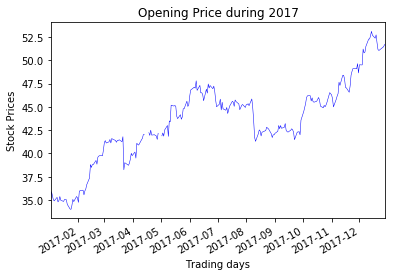

In [174]:
# Look at data to inspect higher and lower values
fig, ax = plt.subplots()
ax.plot(d, open_price[::-1], color='blue', linewidth=0.5, linestyle='solid')
plt.xlabel('Trading days')
plt.ylabel('Stock Prices')
plt.title('Opening Price during 2017')
ax.set_xlim(datemin, datemax)
fig.autofmt_xdate()
plt.show()

In [175]:
x = np.array(open_price, dtype=np.float64) # we'll working with numpy array to find min and max values
max_open = np.nanmax(x)

In [176]:
print ("Higuest opening price: " + str(max_open) + " in " + str(date[open_price.index(max_open)]))

Higuest opening price: 53.11 in 2017-12-14


In [177]:
min_open = np.nanmin(x)
print ("Lower opening price: " + str(min_open) + " in " + str(date[open_price.index(min_open)]))

Lower opening price: 34.0 in 2017-01-24


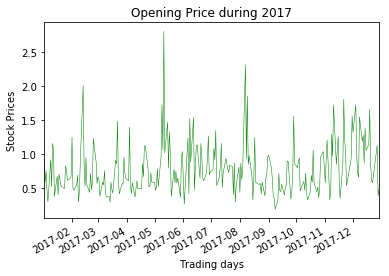

In [178]:
# Largest change in any one day (based on High and Low price)
# Get changes in every day
daily_delta = []

for k in range(l):
    delta = afx_dict['data'][0][k][2] - afx_dict['data'][0][k][3]
    daily_delta.append(delta)
    
# Look at data to inspect values
fig, ax = plt.subplots()
ax.plot(d, daily_delta[::-1], color='green', linewidth=0.5, linestyle='solid')
plt.xlabel('Trading days')
plt.ylabel('Stock Prices')
plt.title('Opening Price during 2017')
ax.set_xlim(datemin, datemax)
fig.autofmt_xdate()
plt.show()

In [179]:
# After to calculate daily delta of price, we get the maximum value
max_daily_delta = np.nanmax(daily_delta)    
print ("Largest change in any one day: " + str(format(max_daily_delta, '.2f')) + " in " + str(date[daily_delta.index(max_daily_delta)]))

Largest change in any one day: 2.81 in 2017-05-11


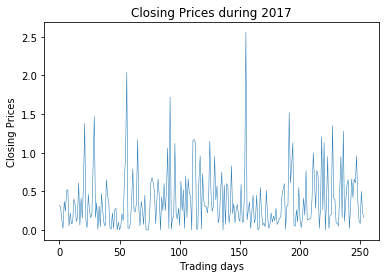

In [180]:
# Largest change between any two days (based on Closing Price)
# Get closing price 
close_delta = []

for k in range(0,l-1):
    delta = np.absolute(afx_dict['data'][0][k][4] - afx_dict['data'][0][k + 1][4])
    close_delta.append(delta)

# Look at data to inspect values
fig, ax = plt.subplots()
ax.plot(close_delta[::-1], linewidth=0.5, linestyle='solid')
plt.xlabel('Trading days')
plt.ylabel('Closing Prices')
plt.title('Closing Prices during 2017')
plt.show()

In [181]:
max_close_delta = np.nanmax(close_delta)
print ("Largest change between any two days: " + str(format(max_close_delta, '.2f')) + " between " + str(date[close_delta.index(max_close_delta)+1]) + " and " + str(date[close_delta.index(max_close_delta)]))

Largest change between any two days: 2.56 between 2017-08-08 and 2017-08-09


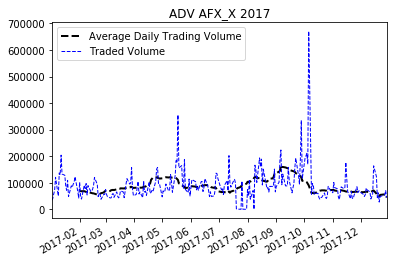

In [183]:
# Average daily trading volume during this year
traded_volume = []
for k in range(l):
    traded_volume.append(afx_dict['data'][0][k][6])
    
# As 22 is the number of trading days in a month, we choose a window=22 days:
def moving_average(data, windows):
    moving_average = []
    for k in range(0,l):
        if k < windows:
            elem = None
        else:
            elem = np.mean(data[k : k + windows])
        moving_average.append(elem)
    return moving_average

fig, ax = plt.subplots()
ax.plot(d, moving_average(traded_volume, 22), color='black', linewidth=2, linestyle='dashed', label="Average Daily Trading Volume")
ax.plot(d, traded_volume, color='blue', linewidth=1, linestyle='dashed', label= "Traded Volume")
plt.title('ADV AFX_X 2017')
plt.legend()
ax.set_xlim(datemin, datemax)
fig.autofmt_xdate()
plt.show()

The average daily trading volume during 2017 is: 84782.12


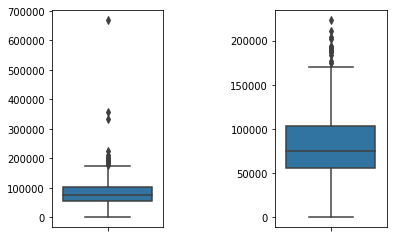

In [189]:
# Median trading volume during this year
# Firstly, we'll use z score to delete outliers
z = np.abs(stats.zscore(traded_volume))

def delete_outliers(data):
    clean_data = []
    for k in data:
        z = (k - np.mean(data))/np.std(data)
        #abs value of z score must be less than 3
        if (z < 3) & (z > -3): 
            clean_data.append(k)
    return clean_data

def avg(data):
    avg = sum(data)/len(data)
    return avg

filt_traded_volume = delete_outliers(traded_volume)

# We compare boxplot before and after clean trading volume data
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(wspace=1)
sns.boxplot(x=traded_volume, orient='v' , ax=axes[0])
sns.boxplot(x=filt_traded_volume,orient='v',ax=axes[1])

print ("The average daily trading volume during 2017 is: " + str(format(avg(filt_traded_volume), '.2f')))